In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
def extract_data(data='Dataset.csv'):
    df = pd.read_csv(data, sep=',')
    return df

# Ahora con esta data, quiero obtener una lista de los valores de Largo y Ancho para cada clase
def obtain_measures(data):
    ''' Acá obtengo una lista con los valores de largo y ancho para cada clase'''
    # dataframes de cada clase
    dataframe_clase_1 = data[data['Clase'] == 1]
    dataframe_clase_2 = data[data['Clase'] == 2]
    # Inicializamos listas para cada clase
    h_c1 = []
    w_c1 = []
    h_c2 = []
    w_c2 = []

    for index, row in data.iterrows():
        clase = row['Clase']
        largo = row['Largo']
        ancho = row['Ancho']
        # Agregamos los valores a la lista correspondiente según la clase
        if clase == 1:
            h_c1.append(largo)
            w_c1.append(ancho)
        elif clase == 2:
            h_c2.append(largo)
            w_c2.append(ancho)

    return h_c1, w_c1, h_c2, w_c2

In [3]:



""" def calc(sigma_0, sigma, media_muestra, n, mu_0):
    return ((n*(sigma_0**2))/(n*(sigma_0**2) +sigma**2)) * media_muestra + ((sigma**2)/(n*(sigma_0**2)+sigma**2))*mu_0
 """
data = extract_data()
h_c1, w_c1, h_c2, w_c2 = obtain_measures(data)
sigma= np.std(w_c1)
media_muestra = np.mean(w_c1)
#mu_0 = np.mean(w_c1[:20])
mu_0 = w_c1[0]
n= len(w_c1)
sigma_0= 1

def values(data):
    sigma= np.std(data)
    media_muestra = np.mean(data)
#mu_0 = np.mean(w_c1[:20])
    mu_0 = data[0]
    n= len(data)
    sigma_0 = 1
    return sigma_0, sigma, mu_0, n, media_muestra


def evolution(muestra, sigma_0, sigma,mu_0):
    results_media, results_sigma = [], []
    for i in range(0, len(muestra)):
        media = ((n*(sigma_0**2))/(n*(sigma_0**2) +sigma**2)) * np.mean(muestra[:i]) + ((sigma**2)/(n*(sigma_0**2)+sigma**2))*mu_0
        Sigma = ((sigma_0**2)*(sigma**2))/(n*(sigma_0**2)+(sigma**2))
        results_media.append(media)
        results_sigma.append(Sigma)
    return results_media, results_sigma
#sigma es el de la muestra, simga_0 lo elijo yo

sigma_0, sigma, mu_0,n, media_muestra = values(w_c1)
sigma_0_2, sigma2, mu_0_2,n2, media_muestra2 = values(w_c2)


results_media, results_sigma = evolution(w_c1, sigma_0, sigma,mu_0 )
print(media_muestra)
print(results_media[-1])

#def std(sigma_0, sigma, n):
#    return ((sigma_0**2)*(sigma**2))/(n*(sigma_0**2)+(sigma**2))

print(sigma)




25.051204819277107
25.629263578542044
5.459083708274923


/home/bryan/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bryan/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


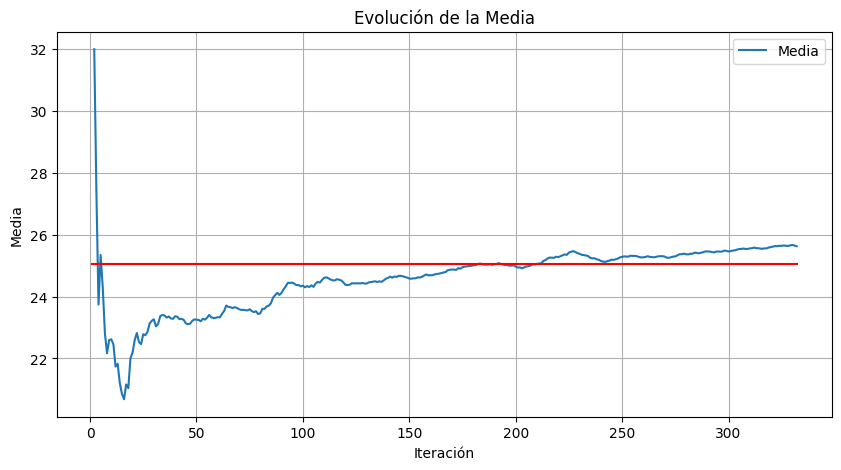

In [4]:
# Graficar los resultados de results_sigma
def plot(muestra, media_real, results_media, results_sigma):
    array = np.arange(1,len(muestra)+1)
    """ plt.figure(figsize=(10, 5))
    plt.plot(array, results_sigma, label='Sigma', marker='o', linestyle='-')
    plt.xlabel('Iteración')
    plt.ylabel('Sigma')
    plt.title('Evolución de Sigma')
    plt.legend()
    plt.grid(True)
    plt.show() """

    # Graficar los resultados de results_media
    plt.figure(figsize=(10, 5))
    plt.plot(array, results_media, label='Media',  linestyle='-')
    plt.xlabel('Iteración')
    plt.ylabel('Media')
    plt.title('Evolución de la Media')
    plt.legend()
    plt.grid(True)

    valor_muestra= np.zeros(len(array))
    for i in range(len(valor_muestra)): valor_muestra[i]= media_real
    plt.plot(array, valor_muestra, color="red")

    plt.show()
plot(w_c1, media_muestra, results_media, results_sigma)

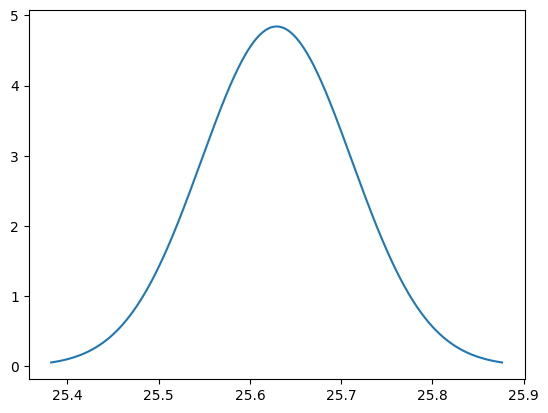

In [5]:
def plot_values(medias, sigmas):
    x = np.linspace(medias[-1] - 3* sigmas[-1], medias[-1] + 3*sigmas[-1], 1000)
    plt.plot(x,stats.norm.pdf(x, medias[-1], sigmas[-1]))


plot_values(results_media,results_sigma)